![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [ ]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# Forzar la recolección de basura
import gc

In [26]:
gc.collect()

0

# *2. Carga de datos*

In [2]:
df = pd.read_csv("./data/dfClustering.csv", sep=';', index_col=False, low_memory=False)

# *3. Exploración de datos*

In [3]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9864 filas y 64 columnas.


In [4]:
df.head(2)

,url,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,web,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,https://www.redpiso.es/inmueble/piso-en-venta-en-calle-fuentespina-santa-eugenia-villa-de-vallecas-ensanche-y-santa-eugenia-madrid-madrid-RP502024130684,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0.00,3.00,4,1,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,redpiso,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876,139,2,1,5,0,1,158,17346,2.61,12370,27,11,0,0,0,0,0,2681389,0,0,0,1,1,329900
1,https://www.indomio.es/anuncios/96528403/,144.00,Salamanca,4,Goya,42,4,Piso,0,1.00,2.00,2,2,0,0,0,1,mas_50,0,lujo,0,0,1,0,0,0,Indomio.com,1,28001,Desconocido,1,0,0,0,0,Normal,Desconocido,0,4,29477,478,4,6,18,0,1,186,38751,2.28,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1354900


In [5]:
df.columns

Index(['url', 'm2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio',
       'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios',
       'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad',
       'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior',
       'piscina', 'porton_electrico', 'videoportero', 'web', 'armarios',
       'codigo_postal', 'tipo_suelo', 'certificado_energetico',
       'puerta_seguridad', 'orientacion_este', 'orientacion_oeste',
       'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte',
       'letra_emisiones', 'num_personas', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro',
       'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
       'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar',
       'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas',
       'hosteleria_restauracion', 'salud_bienestar_

In [6]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
url                              0
m2_constr                        0
distrito                         0
cod_distrito                     0
barrio                           0
cod_barrio                       0
letra_ce                         0
tipologia                        0
estado                           0
amueblado                        0
planta                           0
dormitorios                      0
banos                            0
balcon                           0
terraza                          0
trastero                         0
ascensor                         0
antiguedad                       0
jardin                           0
tipo_inmueble                    0
cancha_tenis                     0
chimenea                         0
exterior                         0
piscina                          0
porton_electrico                 0
videoportero                     0
web                     

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,9864,9864,https://www.pisos.com/comprar/piso-chamberi_almagro28010-43368784747_101800/,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m2_constr,9864.00,NaN,NaN,NaN,138.75,152.77,10.00,68.00,98.00,150.00,4574.00
distrito,9864,21,Centro,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_distrito,9864.00,NaN,NaN,NaN,7.82,5.75,1.00,4.00,6.00,12.00,21.00
barrio,9864,131,Goya,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_barrio,9864.00,NaN,NaN,NaN,81.89,57.61,11.00,41.00,66.00,124.00,215.00
letra_ce,9864.00,NaN,NaN,NaN,0.65,1.41,0.00,0.00,0.00,0.00,7.00
tipologia,9864,6,Piso,8610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado,9864.00,NaN,NaN,NaN,1.39,1.53,0.00,0.00,1.00,2.00,5.00
amueblado,9864.00,NaN,NaN,NaN,0.10,0.30,0.00,0.00,0.00,0.00,1.00


In [8]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      50
object     10
float64     4
Name: count, dtype: int64.


In [9]:
# Obtener lista de columnas que son de tipo object
columnas_object = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar la lista de columnas
print(columnas_object)

['url', 'distrito', 'barrio', 'tipologia', 'antiguedad', 'tipo_inmueble', 'web', 'tipo_suelo', 'aire', 'grupo_cocina']


In [10]:
# Eliminar columnas no necesarias
df = df.drop(columns=['url', 'web'])

In [11]:
# Columnas pendientes de hacer Label Encoding
columnas_object_df = df.select_dtypes(include=['object'])
columnas_object_df.head()

,distrito,barrio,tipologia,antiguedad,tipo_inmueble,tipo_suelo,aire,grupo_cocina
0,Villa De Vallecas,Santa Eugenia,Piso,Desconocido,Desconocido,Desconocido,Normal,Desconocido
1,Salamanca,Goya,Piso,mas_50,lujo,Desconocido,Normal,Desconocido
2,Salamanca,Goya,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
3,Retiro,Jerónimos,Piso,mas_50,Desconocido,Madera,Normal,Equipada
4,San Blas-Canillejas,Simancas,Atico,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido


In [12]:
# Obtener variables que son de tipo float
columnas_float = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float.head()

,m2_constr,amueblado,planta,tamano_medio_del_hogar
0,104.00,0.00,3.00,2.61
1,144.00,1.00,2.00,2.28
2,108.00,0.00,8.00,2.28
3,264.00,1.00,0.00,2.39
4,208.00,0.00,6.00,2.63


In [13]:
# Transformar variables float a tipo int ya que son categóricas
df['amueblado'] = df['amueblado'].astype('int64')

# Obtener variables que son de tipo float
columnas_float_2 = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float_2.head()

,m2_constr,planta,tamano_medio_del_hogar
0,104.00,3.00,2.61
1,144.00,2.00,2.28
2,108.00,8.00,2.28
3,264.00,0.00,2.39
4,208.00,6.00,2.63


In [14]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_2 = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_2}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      51
object      8
float64     3
Name: count, dtype: int64.


In [15]:
# Obtener variables que son de tipo int
columnas_int = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int.head()

,cod_distrito,cod_barrio,letra_ce,estado,amueblado,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,18,182,0,3,0,4,1,0,0,0,1,0,0,0,2,0,0,0,1,28031,0,0,0,0,0,0,0,23876,139,2,1,5,0,1,158,17346,12370,27,11,0,0,0,0,0,2681389,0,0,0,1,1,329900
1,4,42,4,0,1,2,2,0,0,0,1,0,0,0,1,0,0,0,1,28001,1,0,0,0,0,0,4,29477,478,4,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1354900
2,4,42,0,2,0,3,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,29477,478,4,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1175000
3,3,35,0,5,1,4,5,1,0,0,1,0,0,0,2,0,0,0,1,28014,0,0,1,0,0,0,0,6825,82,0,4,8,0,0,138,33396,16179,10,13,408,160,169,349,164,1427833,0,0,0,1,5,5500000
4,20,201,0,2,0,4,2,0,0,0,1,0,0,0,1,0,0,0,1,28037,0,0,0,0,0,0,0,28765,358,9,3,10,0,0,275,19768,16710,44,26,1504,739,381,828,552,995950,0,0,0,1,3,667000


In [16]:
# Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                      'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                      'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                      'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                      'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target']
df[columnas_a_float] = df[columnas_a_float].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final.head()

,cod_distrito,cod_barrio,letra_ce,estado,amueblado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group
0,18,182,0,3,0,0,0,0,1,0,0,0,2,0,0,0,1,28031,0,0,0,0,0,0,0,0,0,0,1
1,4,42,4,0,1,0,0,0,1,0,0,0,1,0,0,0,1,28001,1,0,0,0,0,0,4,0,0,0,5
2,4,42,0,2,0,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,0,0,0,5
3,3,35,0,5,1,1,0,0,1,0,0,0,2,0,0,0,1,28014,0,0,1,0,0,0,0,0,0,0,5
4,20,201,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,28037,0,0,0,0,0,0,0,0,0,0,3


In [17]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_3 = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_3}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      29
float64    25
object      8
Name: count, dtype: int64.


In [18]:
# Obtener variables que son de tipo float
columnas_float_final = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float_final.head()

,m2_constr,planta,dormitorios,banos,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,num_garajes,target
0,104.00,3.00,4.00,1.00,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,1.00,329900.00
1,144.00,2.00,2.00,2.00,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1354900.00
2,108.00,8.00,3.00,2.00,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1175000.00
3,264.00,0.00,4.00,5.00,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,1.00,5500000.00
4,208.00,6.00,4.00,2.00,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,1.00,667000.00


In [19]:
# Mostrar el DataFrame para comparación posterior
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0,3.00,4.00,1.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,0,0,0,1.00,1,329900.00
1,144.00,Salamanca,4,Goya,42,4,Piso,0,1,2.00,2.00,2.00,0,0,0,1,mas_50,0,lujo,0,0,1,0,0,0,1,28001,Desconocido,1,0,0,0,0,Normal,Desconocido,0,4,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1354900.00
2,108.00,Salamanca,4,Goya,42,0,Piso,2,0,8.00,3.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28001,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1175000.00
3,264.00,Retiro,3,Jerónimos,35,0,Piso,5,1,0.00,4.00,5.00,1,0,0,1,mas_50,0,Desconocido,0,0,2,0,0,0,1,28014,Madera,0,0,1,0,0,Normal,Equipada,0,0,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,0,0,0,1.00,5,5500000.00
4,208.00,San Blas-Canillejas,20,Simancas,201,0,Atico,2,0,6.00,4.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,1,0,0,0,1,28037,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,0,0,0,1.00,3,667000.00


In [20]:
# Lista de columnas a transformar
cols_int_obj = df.select_dtypes(include=['int', 'object']).columns.tolist()

# Crear el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna
for col in cols_int_obj:
    df[col] = label_encoder.fit_transform(df[col])

# Mostrar el DataFrame transformado
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,104.00,19,17,112,112,0,5,3,0,3.00,4.00,1.00,0,0,0,1,3,0,0,0,0,2,0,0,0,0,29,1,0,0,0,0,0,2,2,0,0,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,0,0,0,1.00,0,329900.00
1,144.00,14,3,56,20,4,5,0,1,2.00,2.00,2.00,0,0,0,1,4,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,2,2,0,4,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1354900.00
2,108.00,14,3,56,20,0,5,2,0,8.00,3.00,2.00,0,0,0,1,3,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1175000.00
3,264.00,13,2,63,17,0,5,5,1,0.00,4.00,5.00,1,0,0,1,4,0,0,0,0,2,0,0,0,0,13,3,0,0,1,0,0,2,3,0,0,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,0,0,0,1.00,4,5500000.00
4,208.00,15,19,113,118,0,0,2,0,6.00,4.00,2.00,0,0,0,1,3,0,0,0,0,1,0,0,0,0,34,1,0,0,0,0,0,0,2,0,0,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,0,0,0,1.00,2,667000.00


In [21]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_final = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_final}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      37
float64    25
Name: count, dtype: int64.


# *4. Reducción de dimensionalidad*

In [ ]:
# Identificar variables numéricas continuas (float64) y categóricas/dummies (int64)
variables_numericas = df.select_dtypes(include=['float64']).columns
variables_dummies = df.select_dtypes(include=['int64']).columns

# Aplicar StandardScaler solo a las variables numéricas continuas
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Mostrar un resumen de los datos escalados
df.describe()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
count,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00,9864.00
mean,-0.00,8.92,6.82,67.71,46.39,0.65,4.55,1.39,0.10,-0.00,0.00,0.00,0.08,0.19,0.13,0.96,3.02,0.08,0.39,0.00,0.01,1.26,0.04,0.00,0.03,0.10,19.50,1.23,0.19,0.01,0.06,0.05,0.08,0.50,2.04,0.03,0.65,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.05,0.27,0.24,-0.00,2.50,-0.00
std,1.00,5.62,5.75,36.12,37.30,1.41,1.27,1.53,0.30,1.00,1.00,1.00,0.28,0.39,0.34,0.20,0.91,0.34,0.86,0.02,0.07,0.44,0.23,0.03,0.18,0.53,14.13,0.67,0.39,0.10,0.24,0.22,0.27,0.86,0.56,0.18,1.41,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.24,0.75,1.16,1.00,1.48,1.00
min,-0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.63,-2.05,-0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.85,-1.65,-0.42,-1.68,-1.60,-0.37,-1.03,-1.18,-1.57,-1.64,-2.83,-1.23,-2.23,-1.70,-1.63,-1.21,-1.28,-1.51,-0.40,0.00,0.00,0.00,-1.98,0.00,-0.66
25%,-0.46,3.00,3.00,40.00,19.00,0.00,5.00,0.00,0.00,-0.72,-0.59,-0.84,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,-0.73,-0.73,-0.39,-0.83,-0.91,-0.37,-1.03,-0.62,-0.87,-0.47,-0.56,-0.73,-0.67,-0.73,-0.92,-0.79,-0.59,-0.75,-0.35,0.00,0.00,0.00,0.49,1.00,-0.53
50%,-0.27,8.00,5.00,64.00,36.00,0.00,5.00,1.00,0.00,-0.26,0.13,-0.06,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,16.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,-0.23,-0.10,-0.31,0.45,0.06,-0.37,-0.40,-0.56,-0.07,-0.02,0.06,-0.12,0.14,0.00,-0.10,-0.38,-0.42,0.06,-0.28,0.00,0.00,0.00,0.49,3.00,-0.36
75%,0.07,14.00,11.00,101.00,75.00,0.00,5.00,2.00,0.00,0.19,0.13,-0.06,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,30.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.55,0.50,-0.06,0.88,0.62,-0.37,0.23,0.77,1.01,0.95,0.66,0.41,0.80,0.41,1.10,0.32,0.77,0.42,-0.02,0.00,0.00,0.00,0.49,4.00,0.16
max,29.03,20.00,20.00,130.00,130.00,7.00,5.00,5.00,1.00,11.11,8.87,8.60,1.00,1.00,1.00,1.00,5.00,2.00,4.00,1.00,1.00,2.00,2.00,1.00,1.00,7.00,48.00,6.00,1.00,1.00,1.00,1.00,1.00,3.00,8.00,1.00,7.00,2.90,3.86,10.23,1.74,1.58,4.91,2.12,2.83,1.63,1.73,1.42,2.56,1.62,1.78,1.27,2.01,1.87,1.67,4.94,2.00,4.00,8.00,7.91,4.00,17.96


In [29]:
# Reducir memoria
def reduce_mem_usage(df, turn_cat=False, silence=True):
    """Itera sobre todo el dataset convirtiendo cada columna en el tipo más adecuado para ahorrar memoria.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe que se quiere reducir.
    turn_cat : bool, optional
        Transformación de las columnas objeto o string a category, by default False.

    Returns
    -------
    pd.DataFrame
        Dataframe optimizado.
    """

    start_mem = df.memory_usage().sum() / 1024**2  # Memoria inicial

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and not isinstance(col_type, pd.CategoricalDtype):
            c_min = df[col].min()
            c_max = df[col].max()

            if pd.api.types.is_numeric_dtype(df[col]):
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

                # Conversión de float a int si no hay decimales y no hay NaN
                df[col] = df[col].fillna(0)  # Rellenar NaN antes de verificar si son enteros
                # Check if the column is of type float before applying is_integer
                if df[col].dtype.kind == 'f':
                    if all(df[col].apply(float.is_integer)):
                        df[col] = df[col].astype(np.int64)

        # Conversión de objetos a categoría si turn_cat es True
        if turn_cat and col_type == object:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # Memoria final

    if not silence:
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [30]:
# Preparar fichero de control antes de hacer clustering
df.reset_index(drop=True, inplace=True)
df = reduce_mem_usage(df, turn_cat=False, silence=False)

Memory usage after optimization is: 1.31 MB
Decreased by 72.0%


In [31]:
# Generar fichero de control antes de hacer clustering
df.to_csv("dfClustering_LISTO", sep = ";", index=False)

# *5. Clustering de viviendas*

## *5.1 dfCluster*

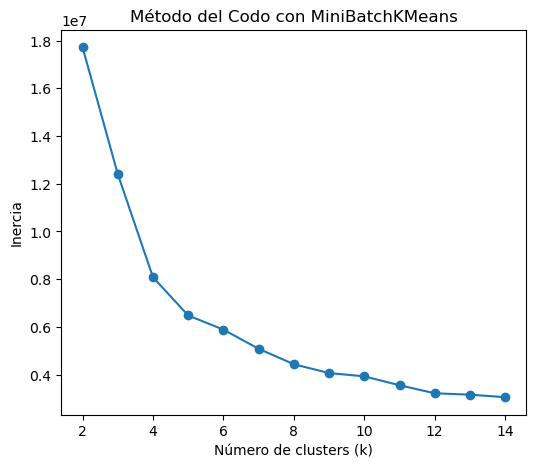

In [32]:
from sklearn.cluster import MiniBatchKMeans

# Definir un rango de valores de k a probar
rango_k = range(2, 15)  # Probamos de 2 a 15 clusters

# Reiniciar la lista de inercias
inercias = []

# Aplicar MiniBatchKMeans en diferentes valores de k
for k in rango_k:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256, n_init=10)
    mini_kmeans.fit(df)
    inercias.append(mini_kmeans.inertia_)

# Graficar el método del codo con MiniBatchKMeans
plt.figure(figsize=(6, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con MiniBatchKMeans')
plt.show()

In [33]:
# Calcular la diferencia de inercias entre cada k para detectar el "codo"
diferencias = np.diff(inercias)

# Encontrar el índice donde la diferencia cambia más bruscamente
k_optimo = rango_k[np.argmin(diferencias) + 1]  # +1 porque np.diff reduce el tamaño en 1

k_optimo

3

In [34]:
# Aplicar MiniBatchKMeans con k=3
kmeans_final = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=256, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df)

# Mostrar el resumen de la asignación de clusters
resumen_clusters = df['cluster'].value_counts().sort_index()

# Visualizar los datos con los clusters asignados
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,cluster
0,-0.23,19,17,112,112,0,5,3,0,0.19,0.86,-0.84,0,0,0,1,3,0,0,0,0,2,0,0,0,0,29,1,0,0,0,0,0,2,2,0,0,-0.28,-0.97,-0.40,-1.68,-1.46,-0.37,-0.40,-0.92,-1.13,0.87,-1.72,-0.56,-1.93,-1.70,-1.63,-1.21,-1.28,-1.51,0.31,0,0,0,0.49,0,-0.35,1
1,0.03,14,3,56,20,4,5,0,1,-0.26,-0.59,-0.06,0,0,0,1,4,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,2,2,0,4,0.11,0.76,-0.38,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,0,0,0,0.49,4,0.60,0
2,-0.20,14,3,56,20,0,5,2,0,2.47,0.13,-0.06,0,0,0,1,3,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0.11,0.76,-0.38,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,0,0,0,0.49,4,0.43,0
3,0.82,13,2,63,17,0,5,5,1,-1.17,0.86,2.30,1,0,0,1,4,0,0,0,0,2,0,0,0,0,13,3,0,0,1,0,0,2,3,0,0,-1.48,-1.26,-0.42,-0.40,-1.04,-0.37,-1.03,-1.18,0.62,-0.02,-1.17,-1.04,-1.78,-1.13,-1.21,-0.69,-0.80,-0.94,-0.02,0,0,0,0.49,4,4.47,0
4,0.45,15,19,113,118,0,0,2,0,1.56,0.86,-0.06,0,0,0,1,3,0,0,0,0,1,0,0,0,0,34,1,0,0,0,0,0,0,2,0,0,0.06,0.15,-0.33,-0.83,-0.77,-0.37,-1.03,0.59,-0.87,0.95,-1.09,-0.09,-0.82,0.42,0.29,-0.03,-0.15,0.40,-0.14,0,0,0,0.49,2,-0.04,1


In [35]:
# Calcular las características promedio de cada cluster
resumen_clusters = df.groupby('cluster').mean()

# Visualizar los resultados
resumen_clusters


,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.09,7.79,2.32,66.38,16.66,0.60,4.59,1.29,0.14,0.04,0.03,0.24,0.11,0.18,0.12,0.97,3.12,0.06,0.48,0.00,0.01,1.24,0.02,0.00,0.04,0.11,12.52,1.22,0.17,0.01,0.06,0.05,0.08,0.58,2.01,0.03,0.60,-0.36,-0.12,-0.28,0.48,0.55,-0.27,-0.03,-0.32,0.57,-0.63,0.33,-0.49,-0.04,0.28,0.42,0.11,0.24,0.10,-0.27,0.03,0.24,0.29,-0.35,3.43,0.24
1,-0.20,10.05,11.87,100.98,80.18,0.69,4.58,1.51,0.04,-0.05,-0.11,-0.35,0.06,0.17,0.13,0.94,2.92,0.08,0.28,0.00,0.00,1.29,0.03,0.00,0.02,0.08,26.06,1.26,0.20,0.01,0.05,0.05,0.07,0.41,2.08,0.03,0.69,0.57,0.19,0.24,-0.65,-0.62,0.33,0.15,0.45,-0.76,0.76,-0.22,0.73,0.13,-0.31,-0.46,-0.15,-0.30,-0.11,0.03,0.07,0.31,0.15,0.36,1.27,-0.34
2,0.05,10.25,11.28,21.78,75.09,0.71,4.40,1.51,0.05,-0.03,0.07,-0.11,0.06,0.24,0.18,0.96,2.94,0.11,0.32,0.00,0.00,1.25,0.08,0.00,0.02,0.11,28.27,1.25,0.20,0.01,0.07,0.06,0.08,0.41,2.06,0.03,0.71,0.12,0.03,0.41,-0.32,-0.53,0.23,-0.15,0.17,-0.39,0.55,-0.55,0.21,-0.10,-0.29,-0.42,-0.09,-0.20,-0.09,0.66,0.05,0.27,0.21,0.40,1.85,-0.13


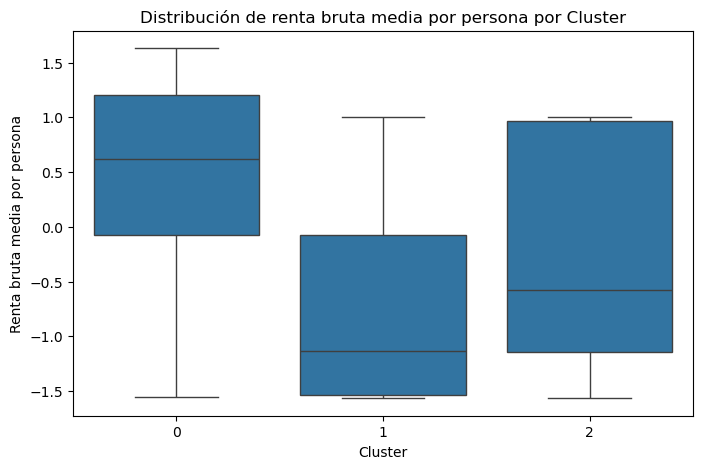

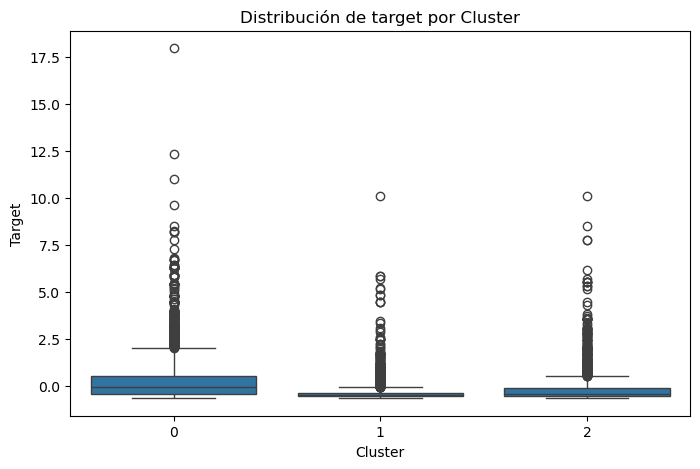

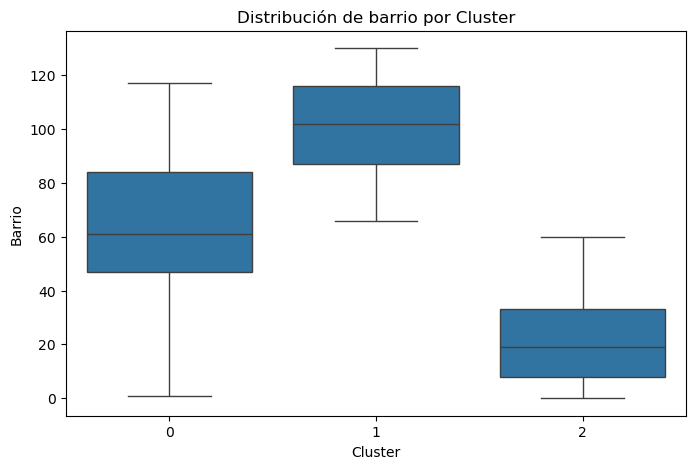

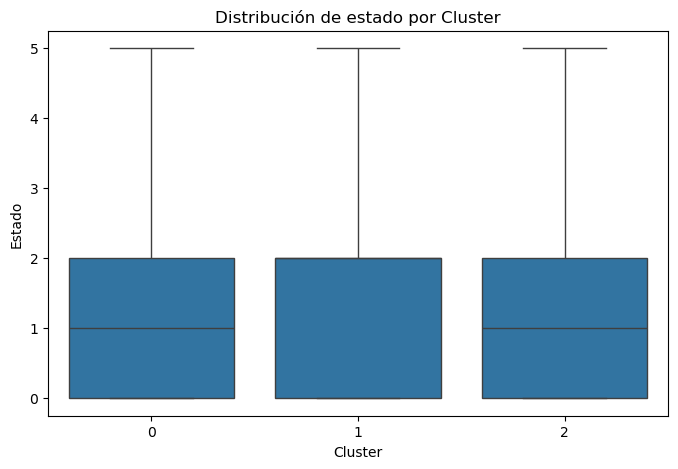

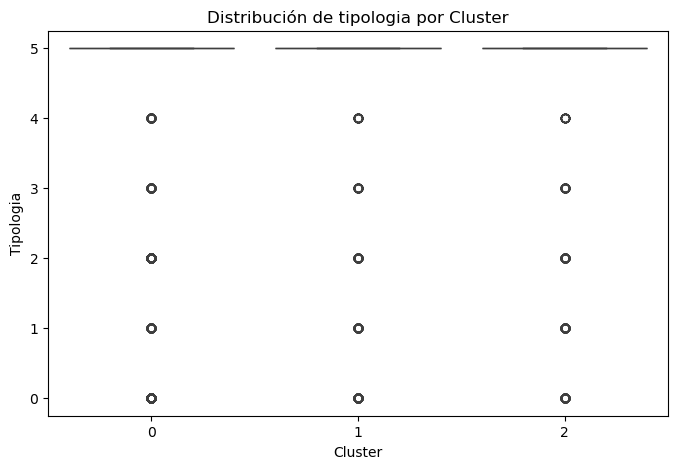

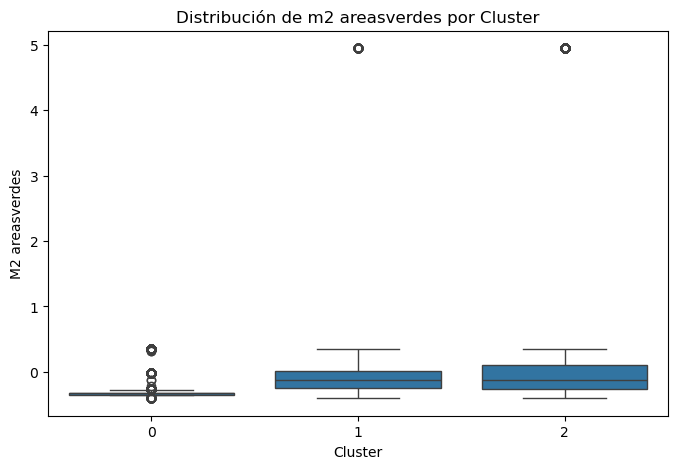

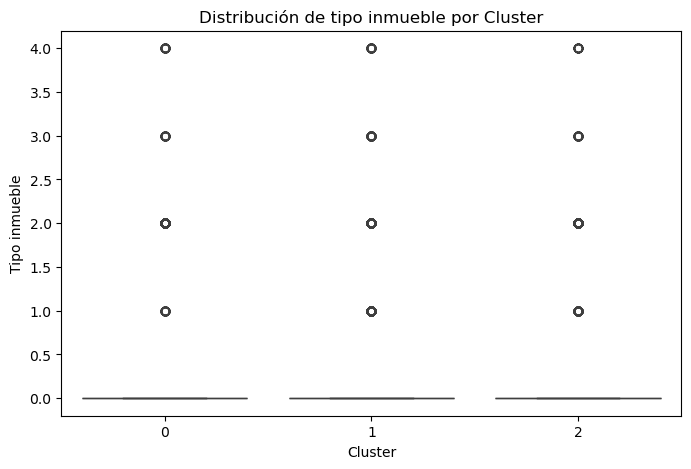

In [37]:
# Graficar la distribución de algunas variables clave por cluster
import seaborn as sns

# Variables clave para visualizar
variables_clave = ["renta_bruta_media_por_persona", "target", "barrio", "estado", 'tipologia', 'm2_areasverdes', 'tipo_inmueble']

# Crear gráficos de distribución por cluster
for var in variables_clave:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["cluster"], y=df[var])
    plt.xlabel("Cluster")
    plt.ylabel(var.replace("_", " ").capitalize())
    plt.title(f"Distribución de {var.replace('_', ' ')} por Cluster")
    plt.show()

In [43]:
# Cargar el dataset original para recuperar la columna 'barrio'
df_original = pd.read_csv("./data/dfClustering.csv", sep=";")

df_original.head(1)

,url,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,web,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,https://www.redpiso.es/inmueble/piso-en-venta-en-calle-fuentespina-santa-eugenia-villa-de-vallecas-ensanche-y-santa-eugenia-madrid-madrid-RP502024130684,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0.00,3.00,4,1,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,redpiso,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876,139,2,1,5,0,1,158,17346,2.61,12370,27,11,0,0,0,0,0,2681389,0,0,0,1,1,329900


In [ ]:
# # Extraer solo la columna 'barrio'
# df_barrio = df_original[['barrio']]

# # Unir la columna 'barrio' con los resultados del clustering
# df_graficas = pd.concat([df_barrio, df], axis=1)

# # Analizar la distribución de clusters por barrio
# clusters_por_barrio = df_graficas.groupby("barrio")["cluster"].value_counts().unstack().fillna(0)

# # Visualizar los resultados
# clusters_por_barrio.head()

In [ ]:
# Merge barrio and clustering results more efficiently
df_graficas = df.assign(barrio=df_original['barrio'])

# Analyze cluster distribution by barrio using a more efficient method
clusters_por_barrio = (df_graficas
                      .groupby("barrio")["cluster"]
                      .value_counts()
                      .unstack(fill_value=0))  # More efficient than fillna(0)

# Display results
clusters_por_barrio


cluster,0,1,2
barrio,,,
Abrantes,0,0,72
Acacias,59,0,0
Adelfas,27,0,0
Aeropuerto,0,0,7
Alameda De Osuna,0,0,23
...,...,...,...
Ventas,0,62,0
Villaverde Alto,0,98,0
Vinateros,0,16,0


In [47]:
# Ordenar los barrios por la cantidad de viviendas en cada cluster
ranking_barrios = clusters_por_barrio.idxmax(axis=1).value_counts()

# Crear un dataframe con el ranking de barrios según el cluster dominante
ranking_barrios_df = pd.DataFrame({'Cluster Dominante': ranking_barrios.index, 'Cantidad de Barrios': ranking_barrios.values})

# Visualizar los resultados
ranking_barrios_df

,Cluster Dominante,Cantidad de Barrios
0,1,53
1,2,40
2,0,38


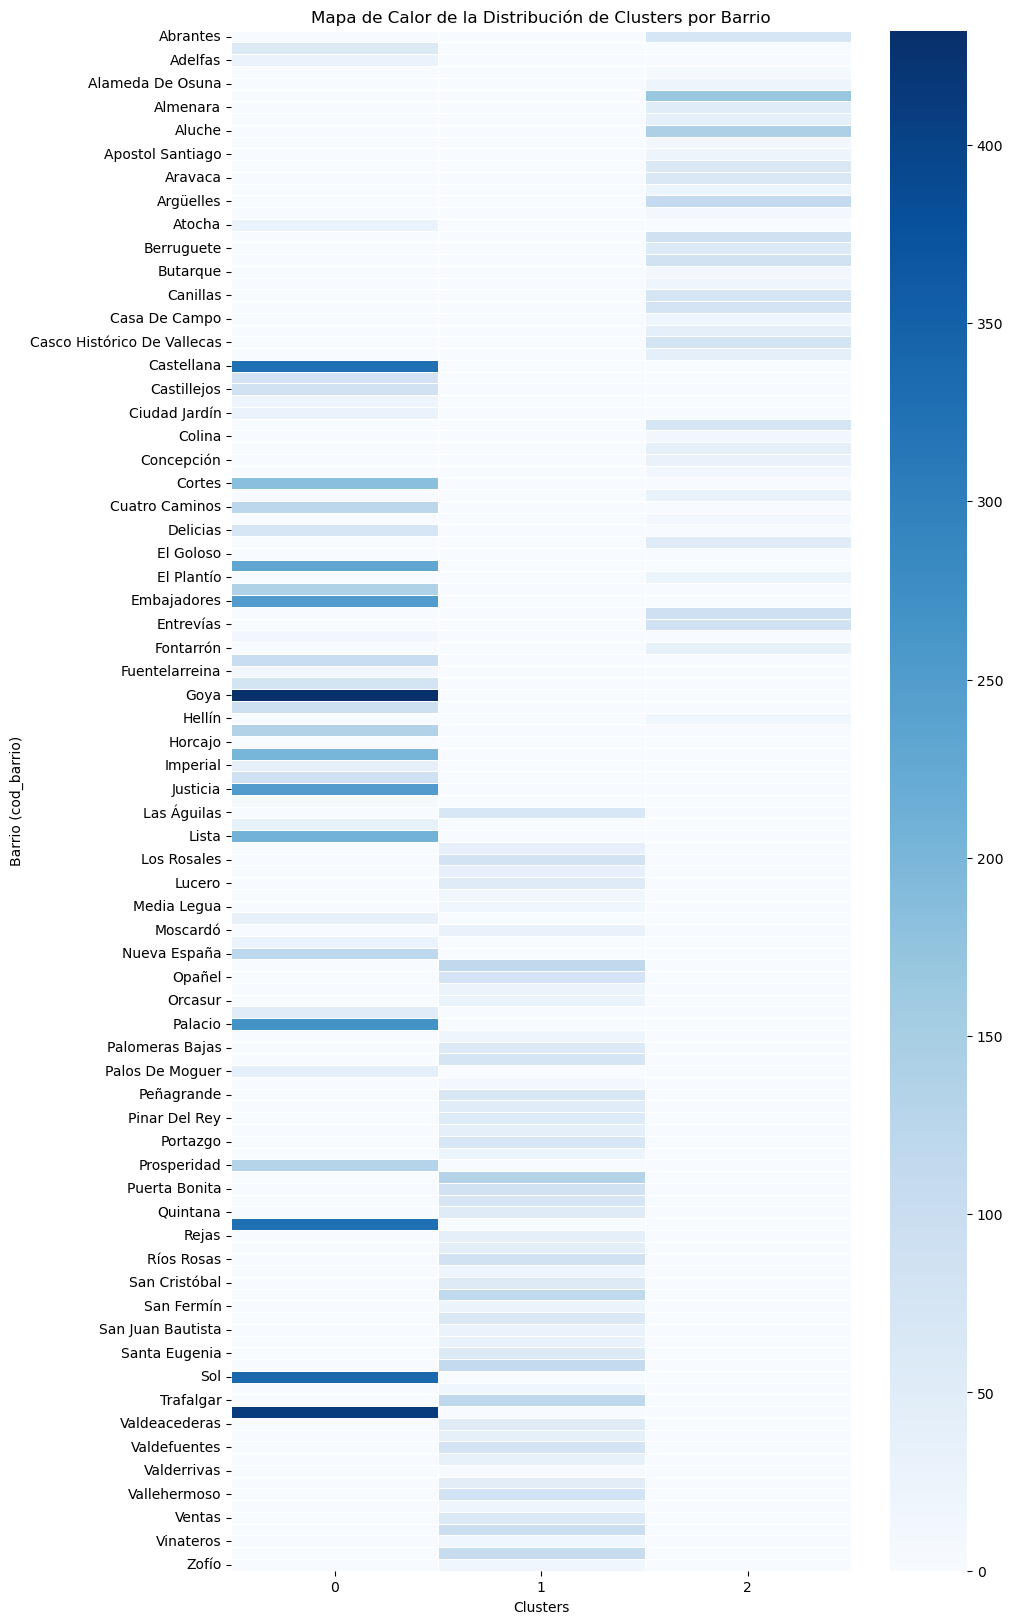

/var/folders/t0/kf4ls9ss5b12r0bynt2jdwgm0000gn/T/ipykernel_14353/4165899255.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")


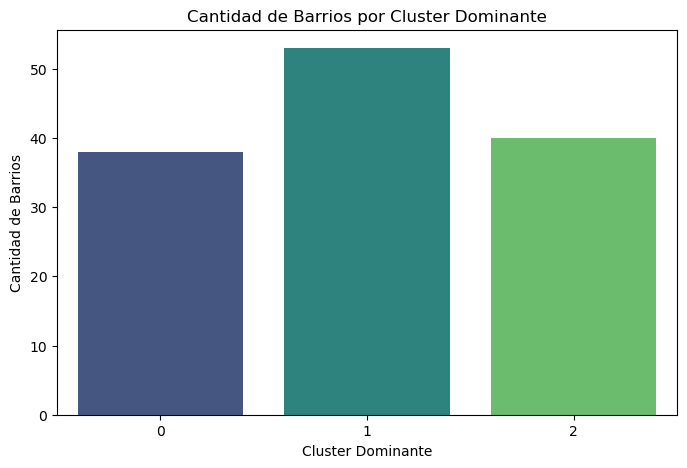

In [48]:
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 20))

# Crear un mapa de calor de la distribución de clusters por barrio
sns.heatmap(clusters_por_barrio, cmap="Blues", linewidths=0.5, annot=False)

# Etiquetas y título
plt.xlabel("Clusters")
plt.ylabel("Barrio (cod_barrio)")
plt.title("Mapa de Calor de la Distribución de Clusters por Barrio")

# Mostrar el gráfico
plt.show()

# Crear gráfico de barras de la cantidad de barrios por cluster dominante
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")

# Etiquetas y título
plt.xlabel("Cluster Dominante")
plt.ylabel("Cantidad de Barrios")
plt.title("Cantidad de Barrios por Cluster Dominante")

# Mostrar el gráfico
plt.show()

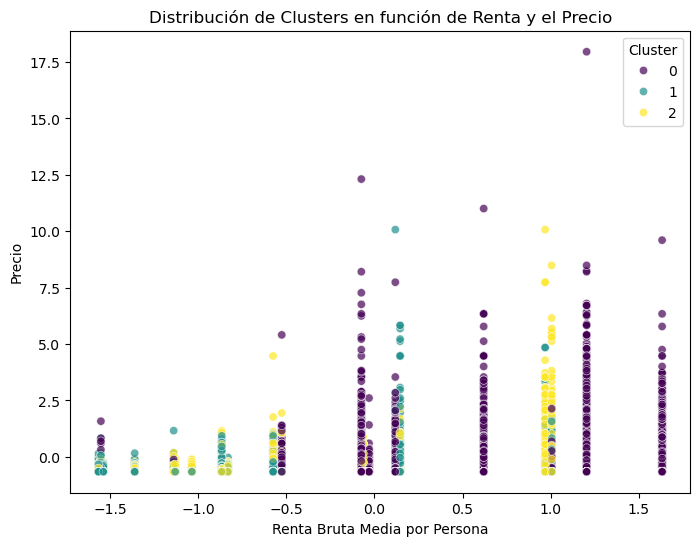

In [52]:
# Crear un gráfico de dispersión de los clusters en función de dos variables clave
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["renta_bruta_media_por_persona"], 
                y=df["target"], 
                hue=df["cluster"], 
                palette="viridis", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Renta Bruta Media por Persona")
plt.ylabel("Precio")
plt.title("Distribución de Clusters en función de Renta y el Precio")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


In [53]:
# Crear un gráfico de dispersión con variables que expliquen las viviendas por zonas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["barrios"], 
                y=df["estado"], 
                hue=df["cluster"], 
                palette="coolwarm", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Barrios")
plt.ylabel("Estado de la vivienda")
plt.title("Distribución de Clusters en función del estado de la vivienda y la ubicación")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


KeyError: 'barrios'

<Figure size 800x600 with 0 Axes>

In [51]:
# Crear un gráfico de dispersión con otra combinación de variables relacionadas con zonas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_graficas["m2_areasverdes"], 
                y=df_graficas["precio"], 
                hue=df_graficas["cluster"], 
                palette="plasma", 
                alpha=0.7)

# Etiquetas y título
plt.xlabel("Metros Cuadrados de Áreas Verdes Cercanas")
plt.ylabel("Precio Medio de la Vivienda en la Zona")
plt.title("Distribución de Clusters en función de Áreas Verdes y Precio Medio de Vivienda")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()


KeyError: 'precio'

<Figure size 800x600 with 0 Axes>

### *5.1.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*
- Útil cuando hay clusters de forma irregular o con ruido.
- No requiere definir el número de clusters, pero es sensible a los parámetros eps y min_samples.

### *5.1.3 Agglomerative Clustering (Jerárquico)*
- No requiere definir el número de clusters antes de tiempo.
- Útil para ver estructuras jerárquicas en los datos.

### *5.1.4 Comparación de métodos*

## *6. Interpretación de Clusters*

### *6.1 Análisis de características*

### *6.2 Validación de la calidad de los Clusters*

### *6.3 Aplicación del resultado a la problemática*